#                                           NETFLIX BUSINESS CASE

Importing the required packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import calendar

## BASIC METRICS ANALYSIS

Loading of dataset and displaying top 10 rows

In [2]:
df_netflix=pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv')
df_netflix.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


Displaying the size of data

In [3]:
df_netflix.shape

(8807, 12)

Displaying dimension of dataset

In [4]:
df_netflix.ndim

2

Displaying all data related to columns in our dataset

In [5]:
df_netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


Displaying stats 

In [6]:
df_netflix.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


## Data Profiling and Cleaning

Handling duplicates amongst rows

In [7]:
# Handling duplicate values

df_netflix1=[df_netflix.columns[0],df_netflix.columns[2]]
new_df=df_netflix[[x for x in df_netflix.columns if x not in df_netflix1]]
new_df1=new_df[new_df.duplicated()]
new_df1

,type,director,cast,country,date_added,release_year,rating,duration,listed_in,description
237,Movie,Rathindran R Prasad,"Aishwarya Rajesh, Vidhu, Surya Ganapathy, Madh...",NaN,"August 23, 2021",2021,TV-14,122 min,"Horror Movies, International Movies, Thrillers","Paranormal activity at a lush, abandoned prope..."
238,Movie,Rathindran R Prasad,"Aishwarya Rajesh, Vidhu, Surya Ganapathy, Madh...",NaN,"August 23, 2021",2021,TV-14,122 min,"Horror Movies, International Movies, Thrillers","Paranormal activity at a lush, abandoned prope..."
239,Movie,Rathindran R Prasad,"Aishwarya Rajesh, Vidhu, Surya Ganapathy, Madh...",NaN,"August 23, 2021",2021,TV-14,122 min,"Horror Movies, International Movies, Thrillers","Paranormal activity at a lush, abandoned prope..."
852,Movie,NaN,NaN,NaN,"May 21, 2021",2021,TV-14,131 min,"Dramas, International Movies, Music & Musicals",Challenged to compose 100 songs before he can ...
3493,Movie,B. V. Nandini Reddy,"Samantha Ruth Prabhu, Lakshmi, Rajendraprasad,...",NaN,"September 25, 2019",2019,TV-14,146 min,"Comedies, International Movies, Music & Musicals",A surly septuagenarian gets another chance at ...
5964,TV Show,NaN,"Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...",NaN,"March 20, 2019",2018,TV-14,1 Season,"International TV Shows, TV Dramas","As a psychology professor faces Alzheimer's, h..."
5965,Movie,Paul Greengrass,"Anders Danielsen Lie, Jon Øigarden, Jonas Stra...","Norway, Iceland, United States","October 10, 2018",2018,R,144 min,"Dramas, Thrillers","After devastating terror attacks in Norway, a ..."
5966,Movie,Swapnaneel Jayakar,"Rahul Pethe, Mrunmayee Deshpande, Adinath Koth...",India,"March 29, 2019",2019,TV-14,124 min,"Comedies, Dramas, Independent Movies","On India's Independence Day, a zany mishap in ..."
6529,Movie,Ozan Açıktan,"Nehir Erdoğan, Tardu Flordun, İlker Kaleli, Se...",Turkey,"October 25, 2019",2014,TV-MA,106 min,"Dramas, International Movies, Thrillers",Secrets bubble to the surface after a sensual ...
8052,Movie,Ron Howard,"Alden Ehrenreich, Woody Harrelson, Emilia Clar...",United States,"January 9, 2019",2018,PG-13,135 min,"Action & Adventure, Children & Family Movies, ...",A young Han Solo tries to settle an old score ...


In [8]:
# Checking presence of duplicates after execution of above query (no duplicates now)

duplicate_rows = df_netflix.iloc[:, 1:]
duplicate_rows1=duplicate_rows[duplicate_rows.duplicated()]
duplicate_rows1

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


Finding null values and handling it

In [9]:
#Checking counts of occurrences of null values across cols

df_netflix.isna().sum().sort_values(ascending=False)

director        2634
country          831
cast             825
date_added        10
rating             4
duration           3
show_id            0
type               0
title              0
release_year       0
listed_in          0
description        0
dtype: int64

In [10]:
# Handling cols other than datetime and duration by setting to Not-Available

df_netflix.fillna({'rating':'Not-Available','cast':'Not-Available','country':'Not-Available','director':'Not-Available'},inplace=True)

In [11]:
# Checking rest nulls after executing above query

df_netflix.isna().sum().sort_values(ascending=False)

date_added      10
duration         3
show_id          0
type             0
title            0
director         0
cast             0
country          0
release_year     0
rating           0
listed_in        0
description      0
dtype: int64

In [12]:
# Dtype conversion for date_added field to timestamp, to handle nulls & inc accuracy of plots ahead

df_netflix['date_added']=pd.to_datetime(df_netflix['date_added'])

In [13]:
# Checking rows where date_added is null 

df_netflix.loc[df_netflix['date_added'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6066,s6067,TV Show,A Young Doctor's Notebook and Other Stories,Not-Available,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaT,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
6174,s6175,TV Show,Anthony Bourdain: Parts Unknown,Not-Available,Anthony Bourdain,United States,NaT,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...
6795,s6796,TV Show,Frasier,Not-Available,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,NaT,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...
6806,s6807,TV Show,Friends,Not-Available,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,NaT,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...
6901,s6902,TV Show,Gunslinger Girl,Not-Available,"Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...",Japan,NaT,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe..."
7196,s7197,TV Show,Kikoriki,Not-Available,Igor Dmitriev,Not-Available,NaT,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...
7254,s7255,TV Show,La Familia P. Luche,Not-Available,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,NaT,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder..."
7406,s7407,TV Show,Maron,Not-Available,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaT,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
7847,s7848,TV Show,Red vs. Blue,Not-Available,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaT,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
8182,s8183,TV Show,The Adventures of Figaro Pho,Not-Available,"Luke Jurevicius, Craig Behenna, Charlotte Haml...",Australia,NaT,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ..."


In [14]:
#Handling date_added column, null values [by placing max dttm value]

most_recent=df_netflix['date_added'].max()
#mst_rctim
df_netflix['date_added'].fillna(most_recent,inplace=True)

In [15]:
#Handling duration column and rating column ambiguity simultaneously

df_netflix[df_netflix.duration.isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


In [16]:
#Swapping values of both cols after checking consistency and feasibility

df_netflix.loc[df_netflix['director']=='Louis C.K.','duration']=df_netflix['rating']
df_netflix.loc[df_netflix['director']=='Louis C.K.','rating']='Not-Available'

In [17]:
#Now here data is swapped and both rating and duration columns have proper data

df_netflix[df_netflix.director=='Louis C.K.'].head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,Not-Available,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,Not-Available,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,Not-Available,66 min,Movies,The comic puts his trademark hilarious/thought...


In [18]:
# Checking if any other null values are left in dataset (Data clean)

df_netflix.isna().sum().sort_values(ascending=False)

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

# Non-Graphical Analysis

In [19]:
pd.DataFrame(df_netflix['type'].value_counts())

,type
Movie,6131
TV Show,2676


In [20]:
pd.DataFrame(df_netflix['date_added'].value_counts())

,date_added
2020-01-01,110
2019-11-01,91
2018-03-01,75
2019-12-31,74
2018-10-01,71
...,...
2017-01-29,1
2017-01-25,1
2017-01-24,1
2017-01-23,1


In [21]:
pd.DataFrame(df_netflix['release_year'].value_counts())

,release_year
2018,1147
2017,1032
2019,1030
2020,953
2016,902
...,...
1959,1
1925,1
1961,1
1947,1


In [22]:
pd.DataFrame(df_netflix['rating'].value_counts())

,rating
TV-MA,3207
TV-14,2160
TV-PG,863
R,799
PG-13,490
TV-Y7,334
TV-Y,307
PG,287
TV-G,220
NR,80


In [23]:
pd.DataFrame(df_netflix['duration'].value_counts())

,duration
1 Season,1793
2 Seasons,425
3 Seasons,199
90 min,152
94 min,146
...,...
16 min,1
186 min,1
193 min,1
189 min,1


## EDA & Visualizations

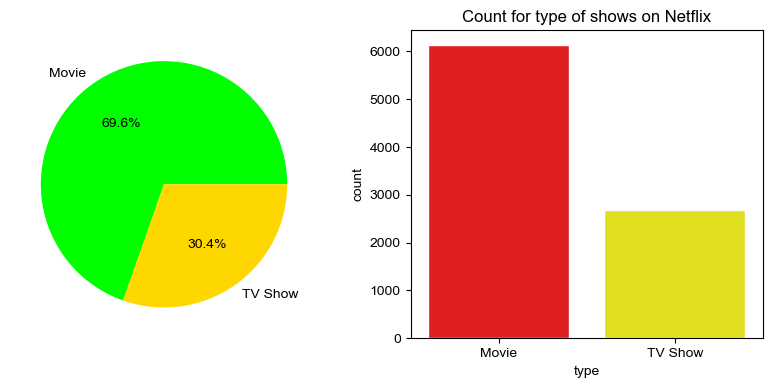

In [24]:
#Types of shows watched on Netflix and its comparison

#plotting the size of graph
plt.figure(figsize=(10, 4))

#plot1 (to show percentages)
#plotting the subplot-1
plt.subplot(1, 2, 1)
#plotting the graph-1 based on their percentage
plt.pie(df_netflix.type.value_counts(), labels=df_netflix.type.value_counts().index,colors=['lime','gold'],autopct='%1.1f%%')


#plot2 (to show counts )
#plotting the subplot-2
plt.subplot(1, 2, 2)

#plotting the graph-2 based on their counts
df_netflix.type.value_counts()
sns.set(style="whitegrid")
color=['Red','Yellow']
sns.set_palette(color)
sns.countplot(x='type',data=df_netflix)
plt.title('Count for type of shows on Netflix')

plt.show()

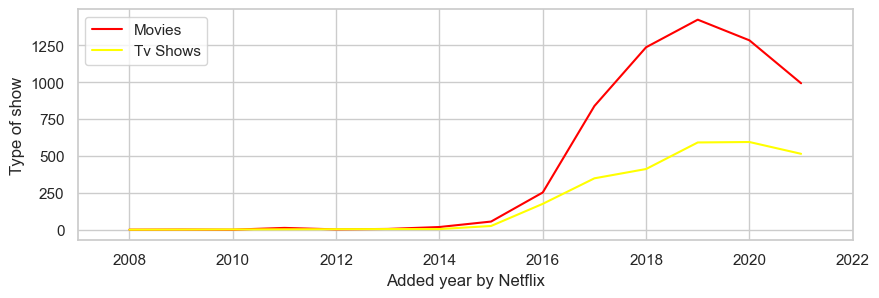

In [25]:
# Does Netflix has more focus on TV Shows than movies in recent years?

#Making a new col which contain year data extracted from date_added col
df_netflix['date_added_year']=df_netflix['date_added'].dt.year

#df_netflix['type'].value_counts()
#Filtering out shows based on type of show
d2 = df_netflix[df_netflix["type"] == "TV Show"]
d3 = df_netflix[df_netflix["type"] == "Movie"]
#Grouping the data extracted based on year criteria(taken out above)
d4=d3.groupby('date_added_year')['type'].count().reset_index()
d5=d2.groupby('date_added_year')['type'].count().reset_index()

#Plotting the graph size
plt.figure(figsize=(10,3))
plt.xlim(left=2007,right=2022) #Putting limit on number of values to be on x-axis
plt.xlabel('Added year by Netflix') 
plt.ylabel('Type of show')
#Plotting the graph
sns.lineplot(data=d4,x='date_added_year',y='type',label='Movies')
sns.lineplot(data=d5,x='date_added_year',y='type',label='Tv Shows')
plt.show()

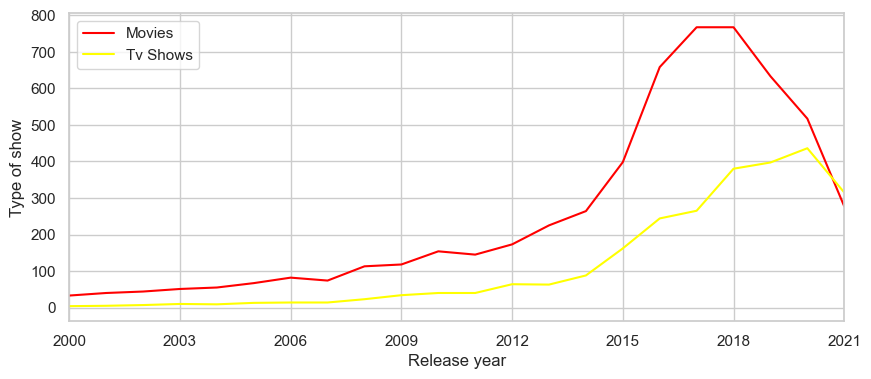

In [27]:
#How has the number of movies released per year changed over the last 20 years? 

d2 = df_netflix[df_netflix["type"] == "TV Show"]
d3 = df_netflix[df_netflix["type"] == "Movie"]
d4=d3.groupby('release_year')['type'].count().reset_index()
d5=d2.groupby('release_year')['type'].count().reset_index()
#Plotting the graph size
plt.figure(figsize=(10,4))
plt.xlim(left=2000,right=2021) #Putting limit on number of values to be on x-axis
plt.xticks(range(2000, 2023, 3)) #Putting gap between values along with start-end on x-axis
plt.xlabel('Release year')
plt.ylabel('Type of show')
sns.lineplot(data=d4,x='release_year',y='type',label='Movies') #Data collected for plotting from above cell
sns.lineplot(data=d5,x='release_year',y='type',label='Tv Shows')
plt.show()

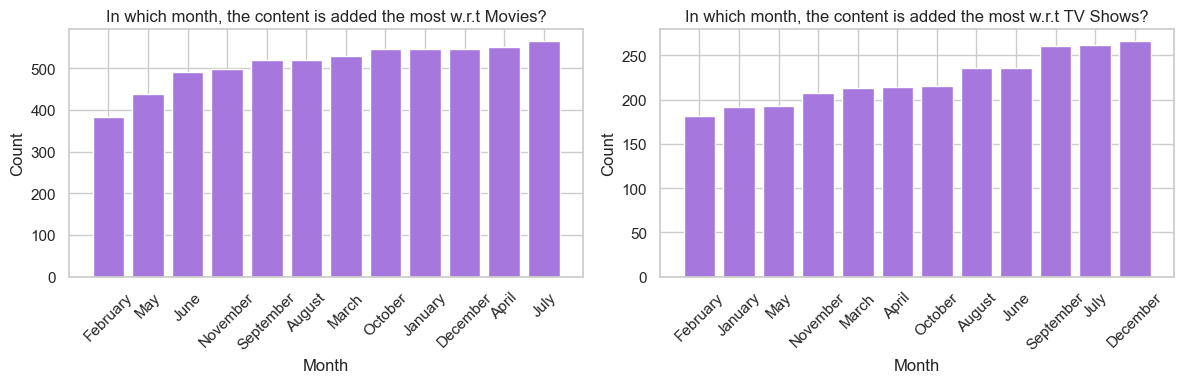

In [28]:
#Month wise segregation of shows added onto Netflix platform

month_names = {i: calendar.month_name[i] for i in range(1, 13)} #Passing int values to map the month names to it

#Making a new col which contain month data extracted from date_added col
df_netflix['month_added'] = df_netflix['date_added'].dt.month
col = 'month_added'

#plot2 (For movies )
d1 = df_netflix[df_netflix["type"] == "Movie"] #Value extraction
vc1 = d1[col].value_counts().reset_index() #resetting index based on counts
vc1 = vc1.rename(columns={col: "count", "index": col}) #Renaming the column
vc1['month_name'] = vc1[col].map(month_names) #mapping the month names with the integer values stated in 1st line
vc1['percent'] = vc1['count'].apply(lambda x: 100 * x / sum(vc1['count'])) #Calculating percent based on total counts

vc1 = vc1.sort_values("count", ascending=True) #Sorting graph to be displayed in inc order

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.bar(vc1['month_name'], vc1["count"], color="#a678de") #Making the plot & applying colors
plt.title("In which month, the content is added the most w.r.t Movies?")
plt.xlabel("Month")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout() #to make the graph fit properly

#plot2 (For Tv-shows)

d1 = df_netflix[df_netflix["type"] == "TV Show"]

vc1 = d1[col].value_counts().reset_index()
vc1 = vc1.rename(columns={col: "count", "index": col})
vc1['month_name'] = vc1[col].map(month_names)
vc1['percent'] = vc1['count'].apply(lambda x: 100 * x / sum(vc1['count']))

vc1 = vc1.sort_values("count", ascending=True)

plt.subplot(1, 2, 2)
plt.bar(vc1['month_name'], vc1["count"], color="#a678de")
plt.title("In which month, the content is added the most w.r.t TV Shows?")
plt.xlabel("Month")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


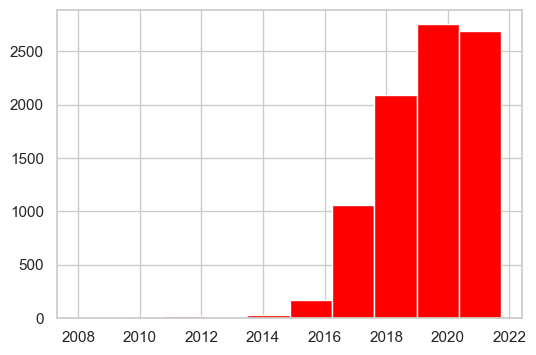

In [29]:
#Plot for Aggregate date added stuff onto netflix for all type of shows
plt.figure(figsize=(6, 4))
df_netflix['date_added'].hist()
plt.show()

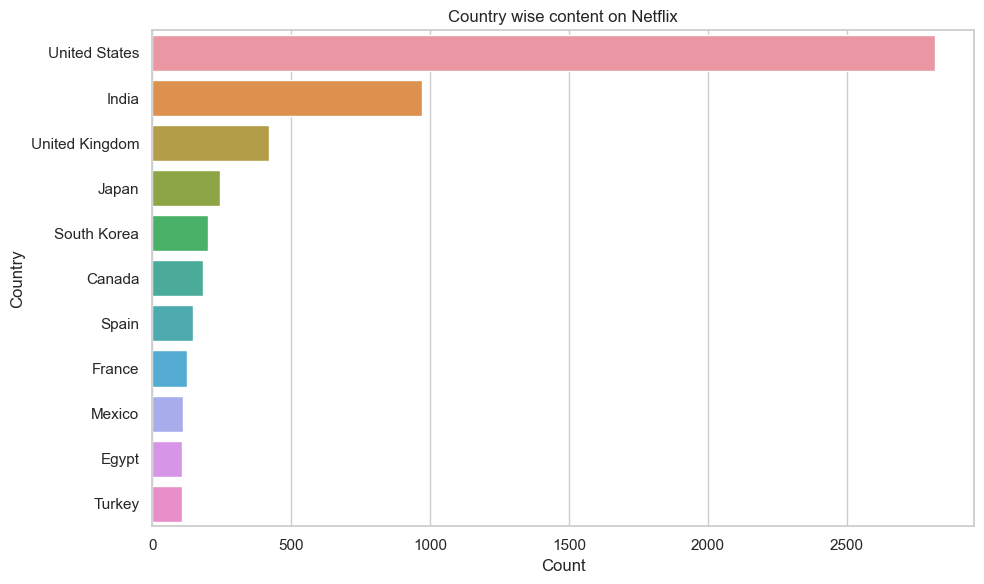

In [30]:
#Group-country Analysis based on particular content released by them(countries) together

df_filtered = df_netflix[df_netflix['country'] != "Not-Available"] #Taking out those rows which have this value, to inc plotting accuracy

plt.figure(figsize=(10,6))
sns.countplot(y='country', order=df_filtered['country'].value_counts().index[0:11], data=df_filtered) #Plotting the graph
plt.title('Country wise content on Netflix')
plt.xlabel('Count')
plt.ylabel('Country')
plt.tight_layout()

plt.show()

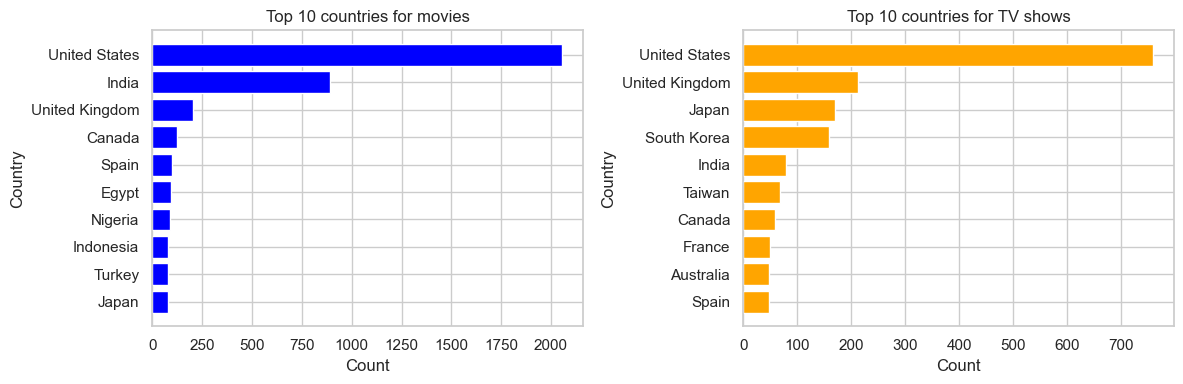

In [31]:
#Top content generated countries (indivually and not grouped ones)

#data filtering
mov = df_netflix[df_netflix['type'] == 'Movie']
tv = df_netflix[df_netflix['type'] == 'TV Show']

#Excluding 'Not-Available' rows data
mov_1 = mov[mov['country'] != 'Not-Available'].copy()
tv_1 = tv[tv['country'] != 'Not-Available'].copy()

# Reset the index of mov_1 and tv_1
mov_1.reset_index(drop=True, inplace=True)
tv_1.reset_index(drop=True, inplace=True)

plt.figure(figsize=(12, 4))

#plot1 (to show counts of Movie )
plt.subplot(1, 2, 1)
top_countries = mov_1['country'].value_counts().index[:10] #Only top 10 country
plt.barh(top_countries, mov_1['country'].value_counts()[top_countries], color='blue')
plt.xlabel('Count')
plt.ylabel('Country')
plt.title('Top 10 countries for movies')
plt.gca().invert_yaxis()  # Inverting y-axis to have the highest count at the top
plt.tight_layout()

#plot2 (to show counts of Tv)
plt.subplot(1, 2, 2)
top_countries1 = tv_1['country'].value_counts().index[:10]
plt.barh(top_countries1, tv_1['country'].value_counts()[top_countries1], color='orange')
plt.xlabel('Count')
plt.ylabel('Country')
plt.title('Top 10 countries for TV shows')
plt.gca().invert_yaxis()
plt.tight_layout()

plt.show()


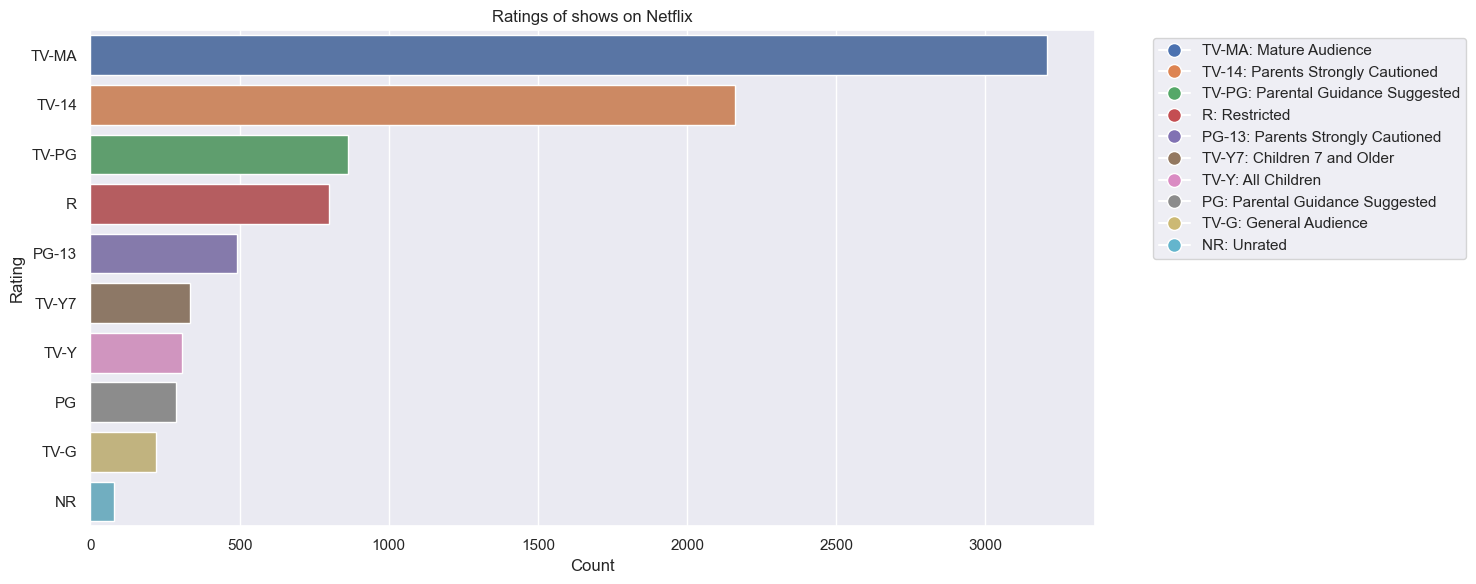

In [57]:
#Major rating given on Netflix

#Specifying meaning of each rating after finding from Google
rating_labels = {
    'G': 'General Audiences',
    'TV-Y': 'All Children',
    'TV-G': 'General Audience',
    'PG': 'Parental Guidance Suggested',
    'TV-Y7': 'Children 7 and Older',
    'TV-Y7-FV': 'Directed to Older Children',
    'TV-PG': 'Parental Guidance Suggested',
    'PG-13': 'Parents Strongly Cautioned',
    'TV-14': 'Parents Strongly Cautioned',
    'R': 'Restricted',
    'NC-17': 'Adults Only',
    'TV-MA': 'Mature Audience',
    'NR': 'Unrated'
}

fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(15, 6))

sns.countplot(y='rating', order=df_netflix['rating'].value_counts().index[0:10], data=df_netflix, ax=ax1)
ax1.set_xlabel('Count')
ax1.set_ylabel('Rating')
ax1.set_title('Ratings of shows on Netflix')

# Create custom legend markers for each rating
legend_markers = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='C{}'.format(i), markersize=10, label=f'{rating}: {rating_labels[rating]}') for i, rating in enumerate(df_netflix['rating'].value_counts().index[0:10])]

# Position the legend outside the plot
ax1.legend(handles=legend_markers, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()

plt.show()

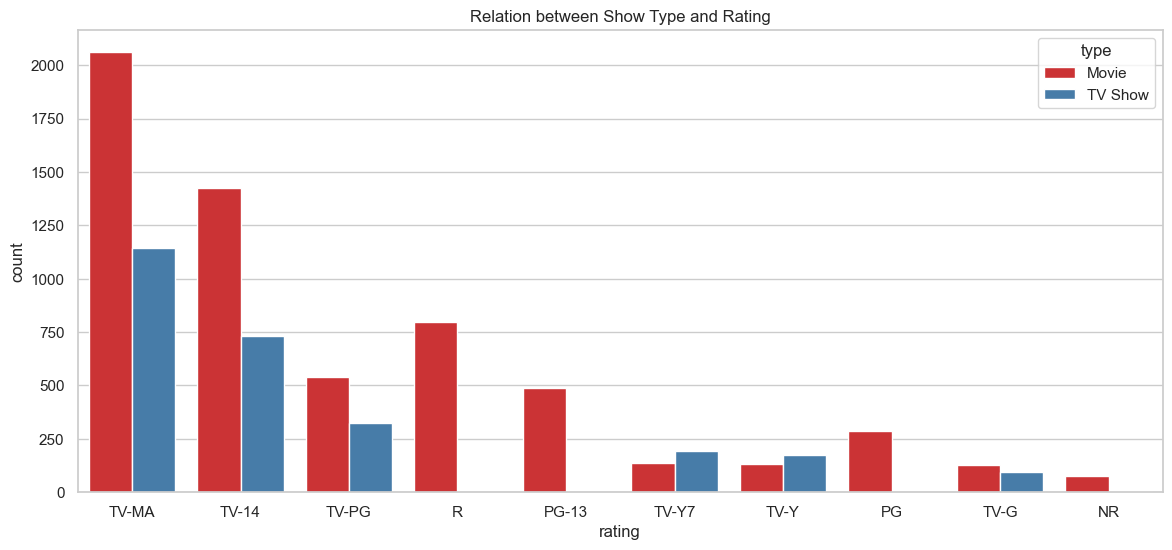

In [33]:
#Comparison of Rating based on type of shows

color_palette = sns.color_palette("Set1")
plt.figure(figsize=(14,6))
sns.countplot(x='rating',hue='type',order=df_netflix['rating'].value_counts().index[0:10],palette=color_palette,data=df_netflix)
plt.title('Relation between Show Type and Rating')
plt.show()

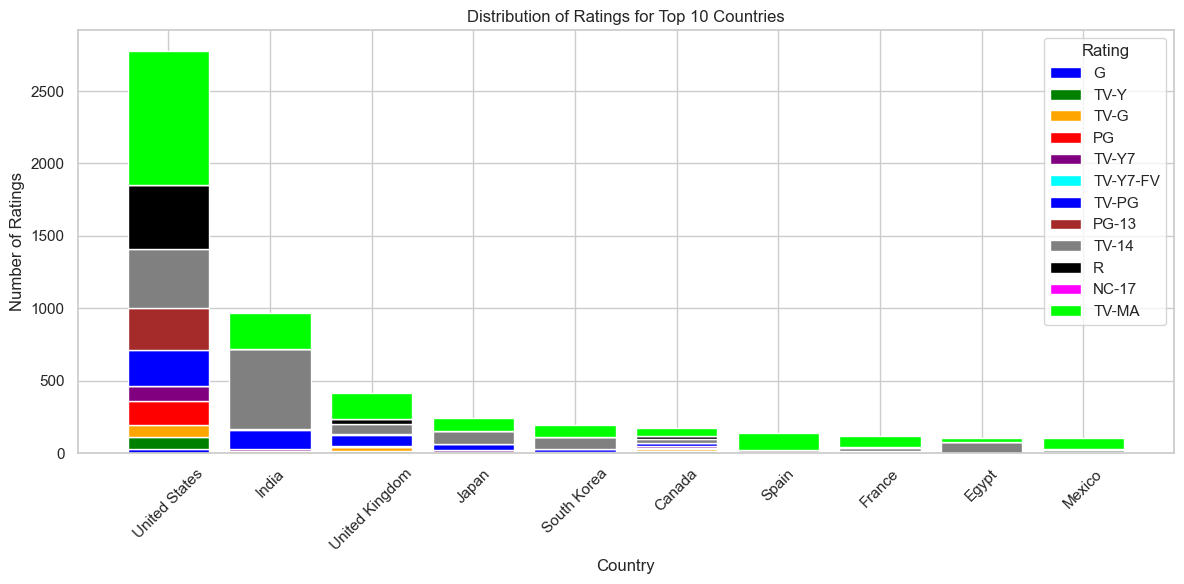

In [34]:
#Ratings  based on country-wise
ratings = ['G', 'TV-Y', 'TV-G', 'PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA']

df_netflix_filtered = df_netflix[df_netflix['country'] != 'Not-Available']

#Using stacks to stack the ratings for a particular country
rating_counts = df_netflix_filtered.groupby(['country', 'rating']).size().unstack(fill_value=0)
rating_counts = rating_counts.reindex(columns=ratings, fill_value=0)

top_10_countries = rating_counts.sum(axis=1).nlargest(10).index
top_10_rating_counts = rating_counts.loc[top_10_countries]


plt.figure(figsize=(12, 6))
bottom = [0] * len(top_10_countries) #Top 10 countries
custom_colors = ['blue', 'green', 'orange', 'red', 'purple', 'cyan', 'blue', 'brown', 'gray', 'black', 'magenta', 'lime'] #Specifying colors to be used

for i, rating in enumerate(ratings):
    plt.bar(top_10_countries, top_10_rating_counts[rating], bottom=bottom, label=rating,color=custom_colors[i])
    bottom = [bottom[i] + top_10_rating_counts[rating][i] for i in range(len(top_10_countries))]

plt.xlabel('Country')
plt.ylabel('Number of Ratings')
plt.title('Distribution of Ratings for Top 10 Countries')
plt.xticks(rotation=45)
plt.legend(title='Rating', loc='upper right')
plt.tight_layout()

plt.show()

<Axes: xlabel='rating', ylabel='duration_pairplot'>

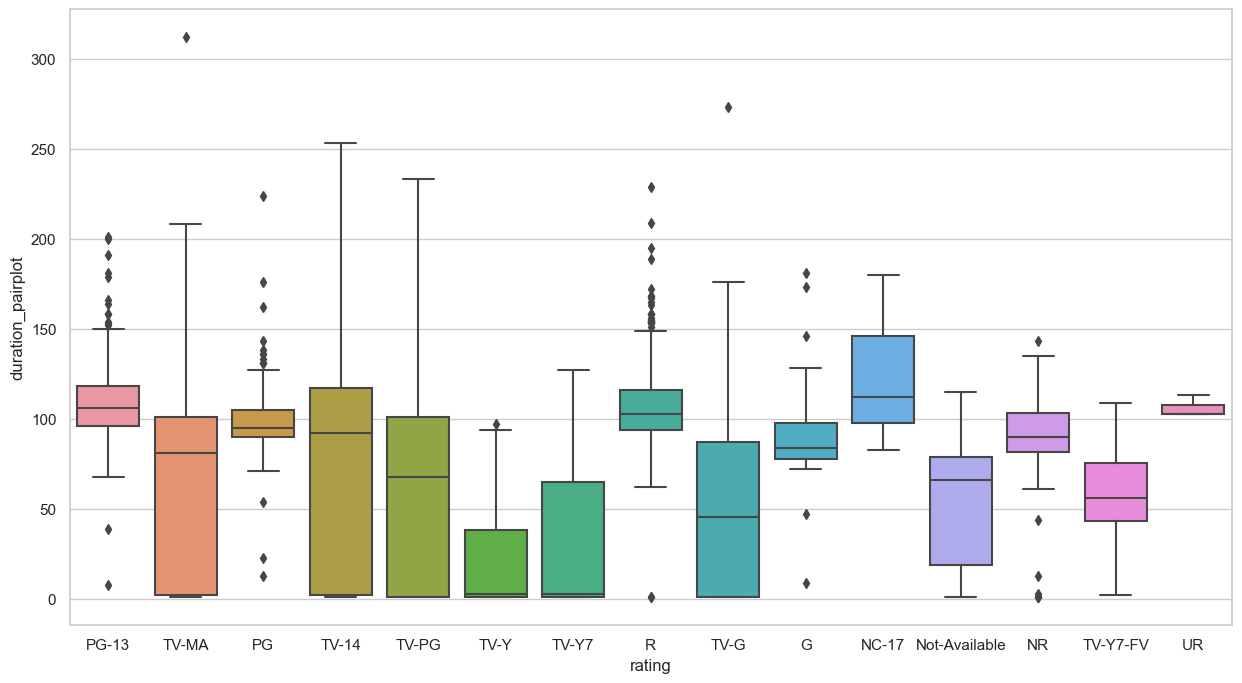

In [35]:
# Plotting duration of shows vs ratings [boxplot] {To take out ratings median}

#conversion of duration to a numeric dtype for plotting
df_netflix['duration_pairplot'] = df_netflix['duration'].str.split(' ').str.get(0)
df_netflix['duration_pairplot'] = df_netflix['duration_pairplot'].astype(float)

plt.figure(figsize=(15,8))
sns.boxplot(x = df_netflix['rating'], y = df_netflix['duration_pairplot'])


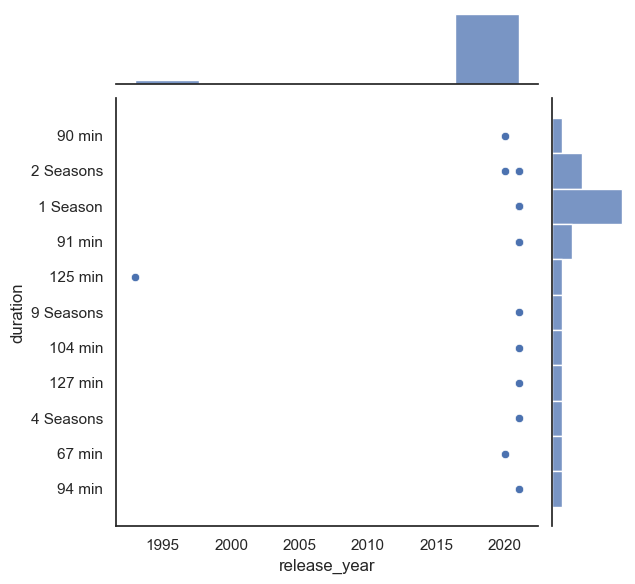

In [36]:
# Duration and Release year correlation
columns_to_plot = ['release_year', 'duration']

top_10 = df_netflix.head(20)

# Creating a jointplot for the top 20 records
sns.set(style="white")
sns.jointplot(data=top_10, x=columns_to_plot[0], y=columns_to_plot[1], kind="scatter")
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_13320\3835558794.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap( df_new.corr() , annot=True,linewidth = 0.5 , cmap = 'coolwarm' )


<Axes: >

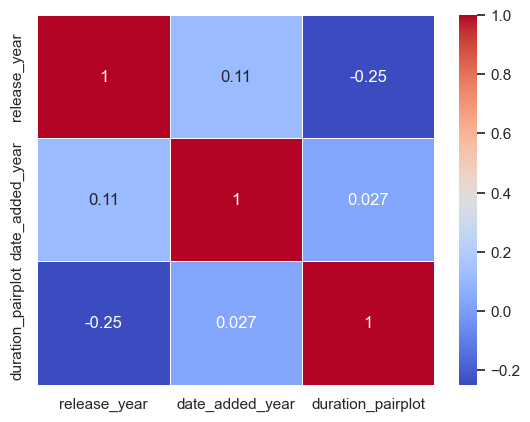

In [59]:
# Correlation between different kinds of time-series data and show types 
df_new=df_netflix[['type','release_year','date_added_year','duration_pairplot']]
sns.heatmap( df_new.corr() , annot=True,linewidth = 0.5 , cmap = 'coolwarm' )

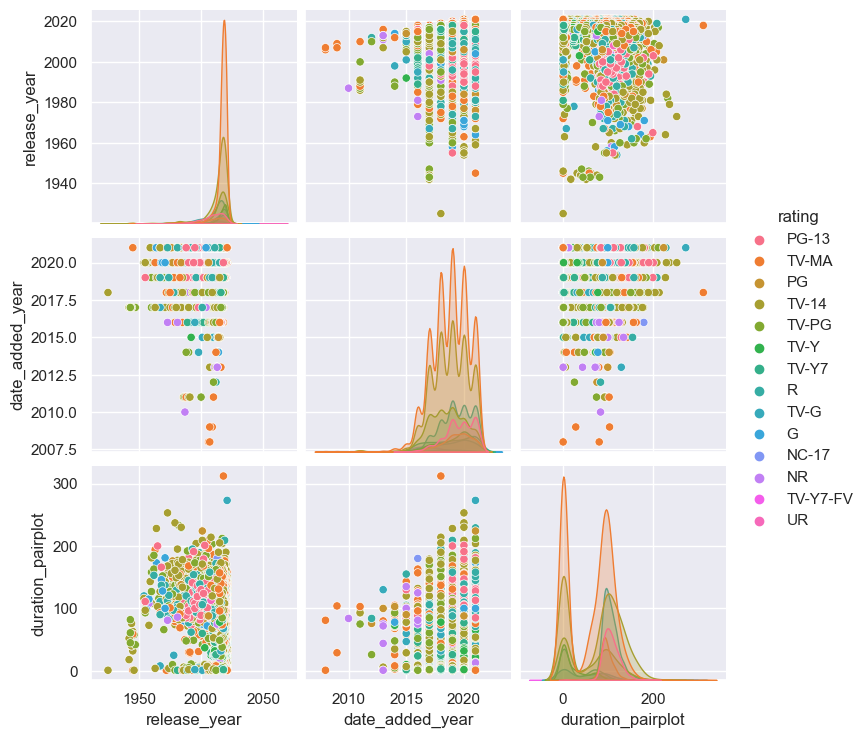

In [60]:
#Pairplots for plotting relation between ratings and different kinds of time-related data
df_new=df_netflix[['rating','release_year','date_added_year','duration_pairplot']]
df_netflix_filtered = df_new[df_new['rating'] != 'Not-Available']
sns.pairplot(df_netflix_filtered, hue = 'rating')

Text(0.5, 1.0, 'Content release on Netflix year-wise')

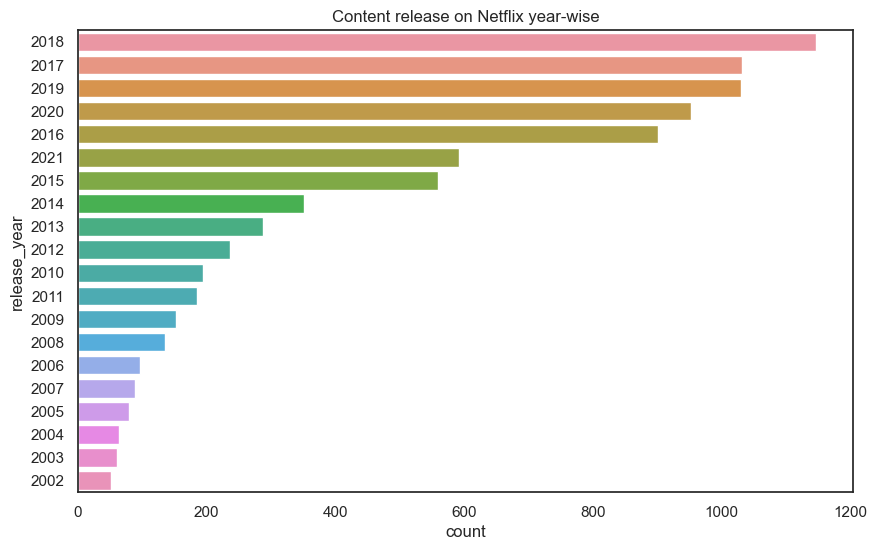

In [39]:
#Which year max content released
df_netflix.release_year.value_counts().head(20)
plt.figure(figsize=(10,6))
sns.countplot(y='release_year',order=df_netflix['release_year'].value_counts().index[0:20],data=df_netflix)
plt.title('Content release on Netflix year-wise')

C:\Users\Dell\AppData\Local\Temp\ipykernel_13320\2115306291.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  durations['no_of_seasons'] = durations['duration'].str.extract('(\d+)').astype(float)
C:\Users\Dell\AppData\Local\Temp\ipykernel_13320\2115306291.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  durations['no_of_seasons'] = durations['no_of_seasons'].fillna(0)  # Handle movies ('90 min' case)


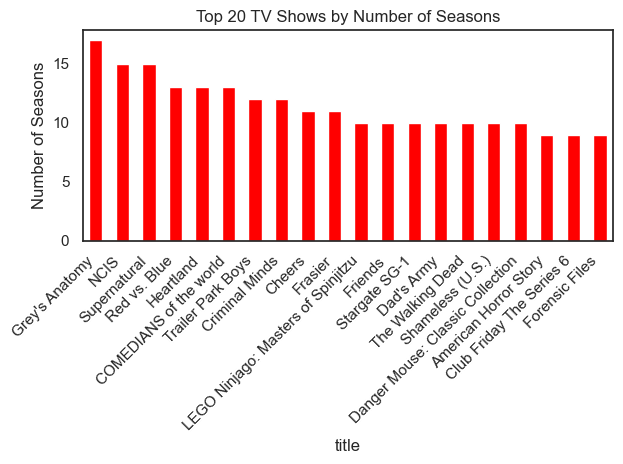

In [40]:
#TV shows with largest number of seasons

features = ['title', 'duration']
durations = df_netflix[features]

# Convert 'duration' values to appropriate format
durations['no_of_seasons'] = durations['duration'].str.extract('(\d+)').astype(float)
durations['no_of_seasons'] = durations['no_of_seasons'].fillna(0)  # Handle movies ('90 min' case)
durations.loc[durations['duration'].str.contains('min'), 'no_of_seasons'] = 0  # Set movies to 0

t = ['title', 'no_of_seasons']
top = durations[t]

top = top.sort_values(by='no_of_seasons', ascending=False)
top20 = top.head(20)

top20.plot(kind='bar', x='title', y='no_of_seasons', color='red', legend=None)
plt.ylabel('Number of Seasons')
plt.title('Top 20 TV Shows by Number of Seasons')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_13320\3890908672.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_movies_df['duration'] = netflix_movies_df['duration'].str.extract('(\d+)',expand=False).astype(int)
C:\Users\Dell\AppData\Local\Temp\ipykernel_13320\3890908672.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_shows_df['duration'] = netflix_shows_df['duration'].str.extract('(\d+)',expand=False).astype(int)


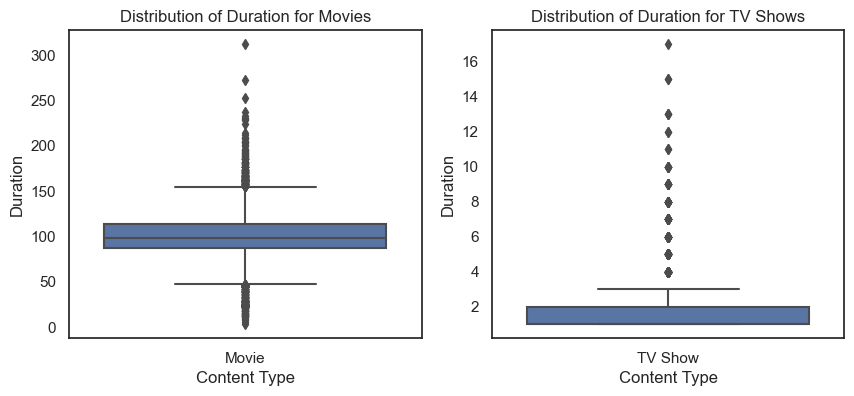

In [41]:
#Duration of movies distribution

netflix_movies_df = df_netflix[df_netflix.type.str.contains("Movie")]
netflix_shows_df = df_netflix[df_netflix.type.str.contains("TV Show")]
netflix_movies_df['duration'] = netflix_movies_df['duration'].str.extract('(\d+)',expand=False).astype(int)
netflix_shows_df['duration'] = netflix_shows_df['duration'].str.extract('(\d+)',expand=False).astype(int)

plt.figure(figsize=(10, 4))

#plot1 (to show percentages)
plt.subplot(1, 2, 1)
# Creating a boxplot for movie duration

sns.boxplot(data=netflix_movies_df, x='type', y='duration')
plt.xlabel('Content Type')
plt.ylabel('Duration')
plt.title('Distribution of Duration for Movies')

#plot2 (to show counts )
plt.subplot(1, 2, 2)
# Creating a boxplot for movie duration
sns.boxplot(data=netflix_shows_df, x='type', y='duration')
plt.xlabel('Content Type')
plt.ylabel('Duration')
plt.title('Distribution of Duration for TV Shows')

plt.show()


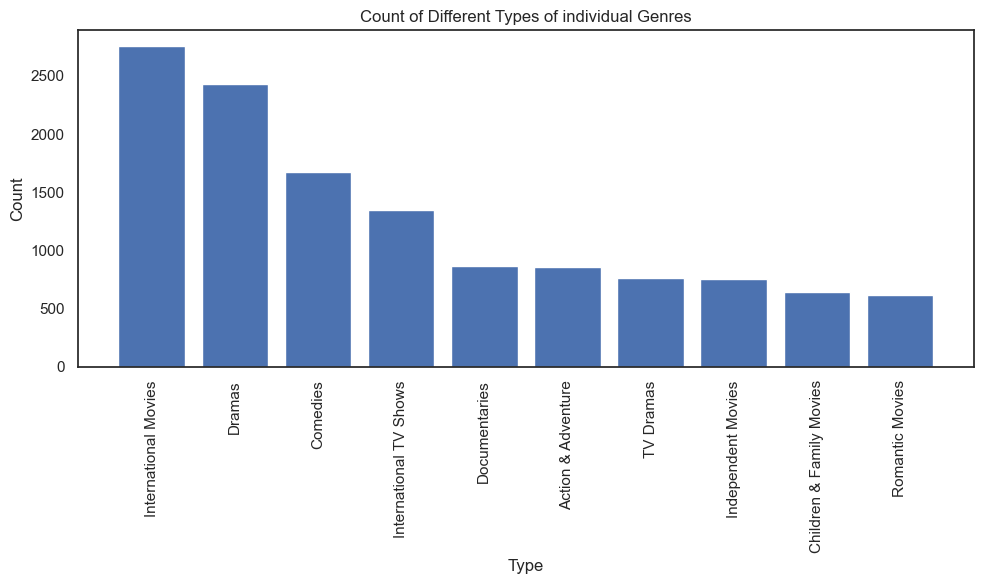

In [42]:
#Popular Genre for individual level
listed_types = []
for row, items in df_netflix.iterrows():
    for item in items['listed_in'].split(","):
        if item.strip() not in listed_types:
            listed_types.append(item.strip())

nums = [0] * len(listed_types)
for row, items in df_netflix.iterrows():
    for item in items['listed_in'].split(","):
        index = listed_types.index(item.strip())
        nums[index] += 1

df_listing = pd.DataFrame({"Type": listed_types, "Count": nums})

# Sort the DataFrame in descending order based on Count
df_listing_sorted = df_listing.sort_values(by="Count", ascending=False).head(10)

# Plotting the sorted bar chart
plt.figure(figsize=(10, 6))
plt.bar(df_listing_sorted['Type'], df_listing_sorted['Count'])
plt.xticks(rotation=90)
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Count of Different Types of individual Genres')
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Genre Name')

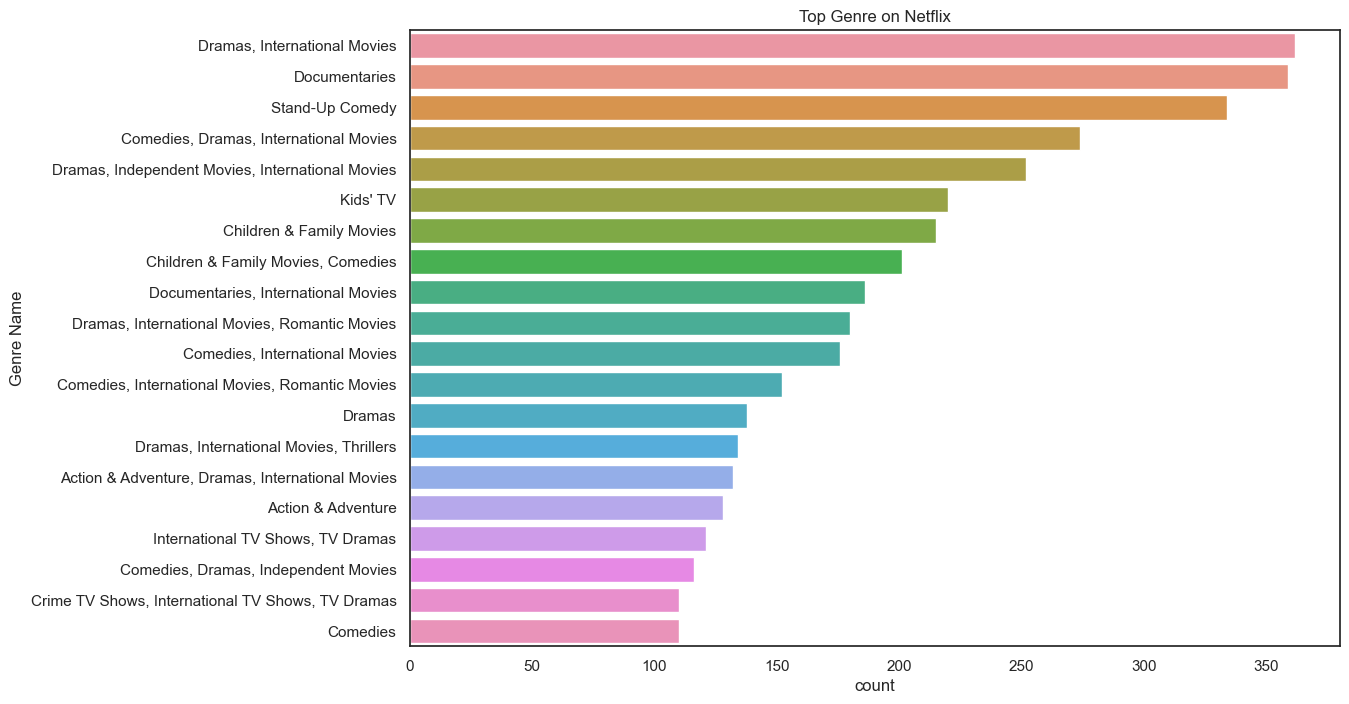

In [43]:
#Popular Genre groups

plt.figure(figsize=(12,8))
sns.countplot(y='listed_in',order=df_netflix['listed_in'].value_counts().index[0:20],data=df_netflix)
plt.title('Top Genre on Netflix')
plt.ylabel("Genre Name")

C:\Users\Dell\AppData\Local\Temp\ipykernel_13320\3690345487.py:23: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  genre_data.pivot('genre', 'release_year', 'count'),


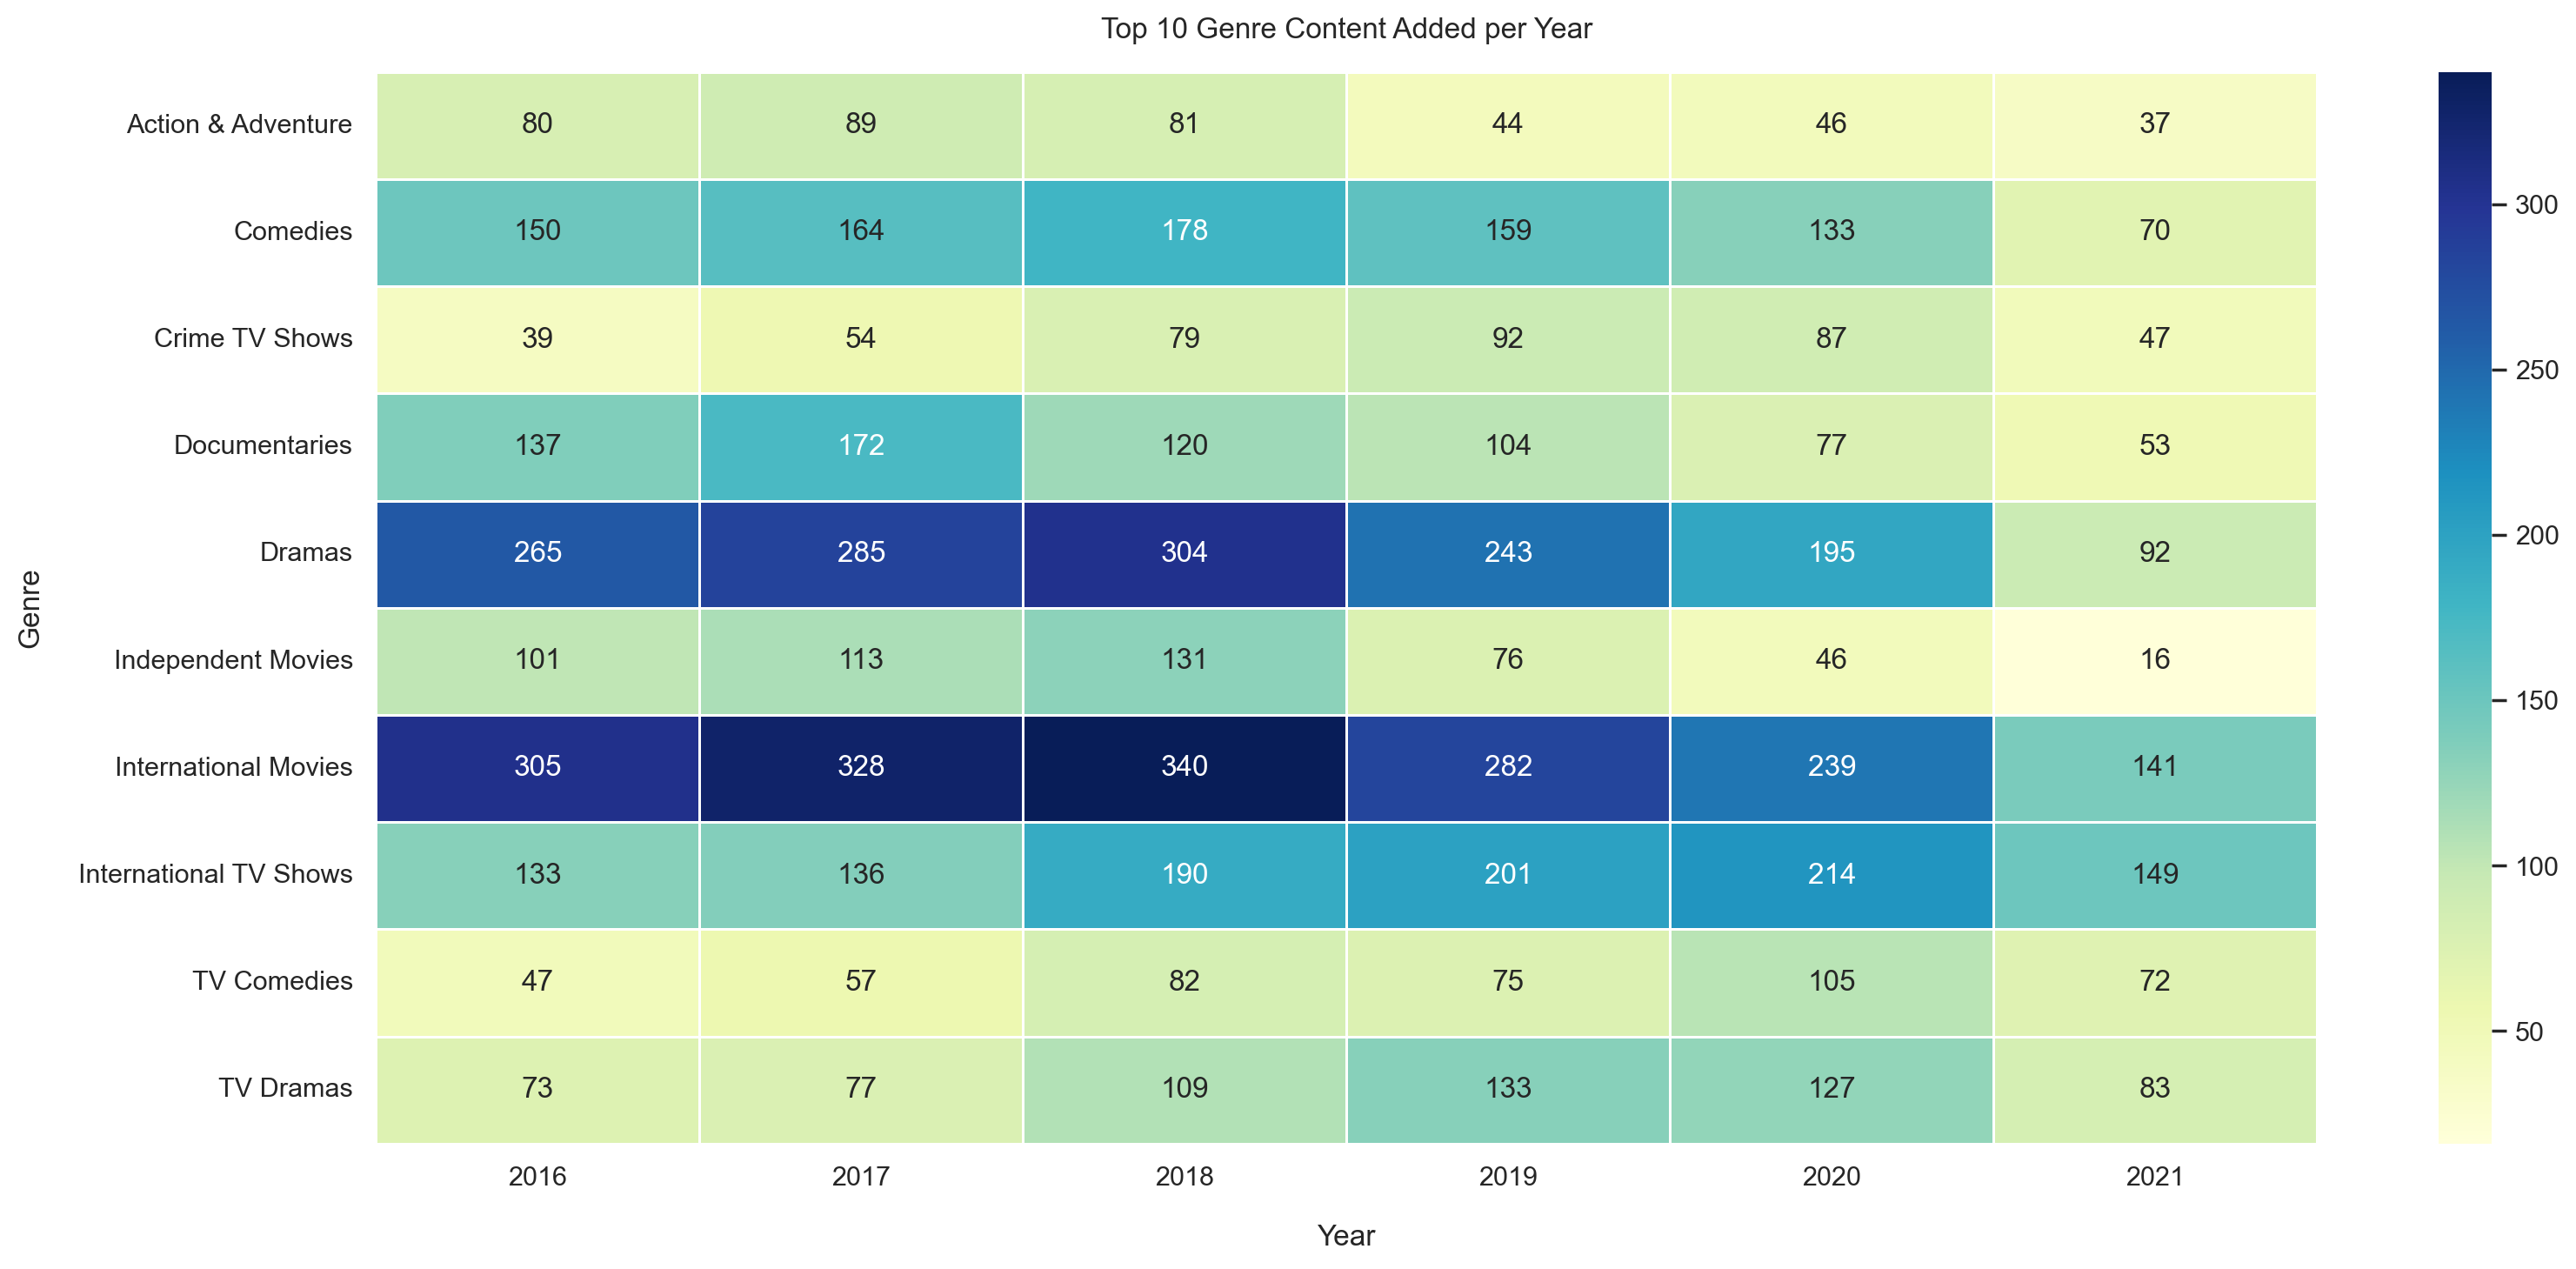

In [44]:
#What are the most popular genres added mostly per year on Netflix?

#Exploding the data/splitting the nested data to use in plots
def explode_data(df_netflix, column_to_explode, new_column_name):
    exploded_data = df_netflix.copy()
    exploded_data[new_column_name] = exploded_data[column_to_explode].str.split(', ')
    exploded_data = exploded_data.explode(new_column_name)
    return exploded_data

genre_data = explode_data(df_netflix, 'listed_in', 'genre')
genre_data = genre_data[genre_data['release_year'] > 2015]

# Group by genre and release year, then summing the values
genre_data = genre_data.groupby(['genre', 'release_year']).size().reset_index(name='count')

# Get the top 10 genres based on total counts across all years
top_genres = genre_data.groupby('genre')['count'].sum().nlargest(10).index
genre_data = genre_data[genre_data['genre'].isin(top_genres)]

# Create the heatmap
plt.figure(figsize=(18, 8), dpi=200)
ax = sns.heatmap(
    genre_data.pivot('genre', 'release_year', 'count'),
    annot=True,
    fmt="d",
    cmap='YlGnBu',  # Choose an appropriate color map
    linewidths=.5
)

ax.set_xlabel('Year', labelpad=14)
ax.set_ylabel('Genre', labelpad=14)
ax.set_title('Top 10 Genre Content Added per Year', pad=14)

plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_13320\2073509036.py:43: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  .pivot("genre", "country", 0)
C:\Users\Dell\AppData\Local\Temp\ipykernel_13320\2073509036.py:43: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  .pivot("genre", "country", 0)


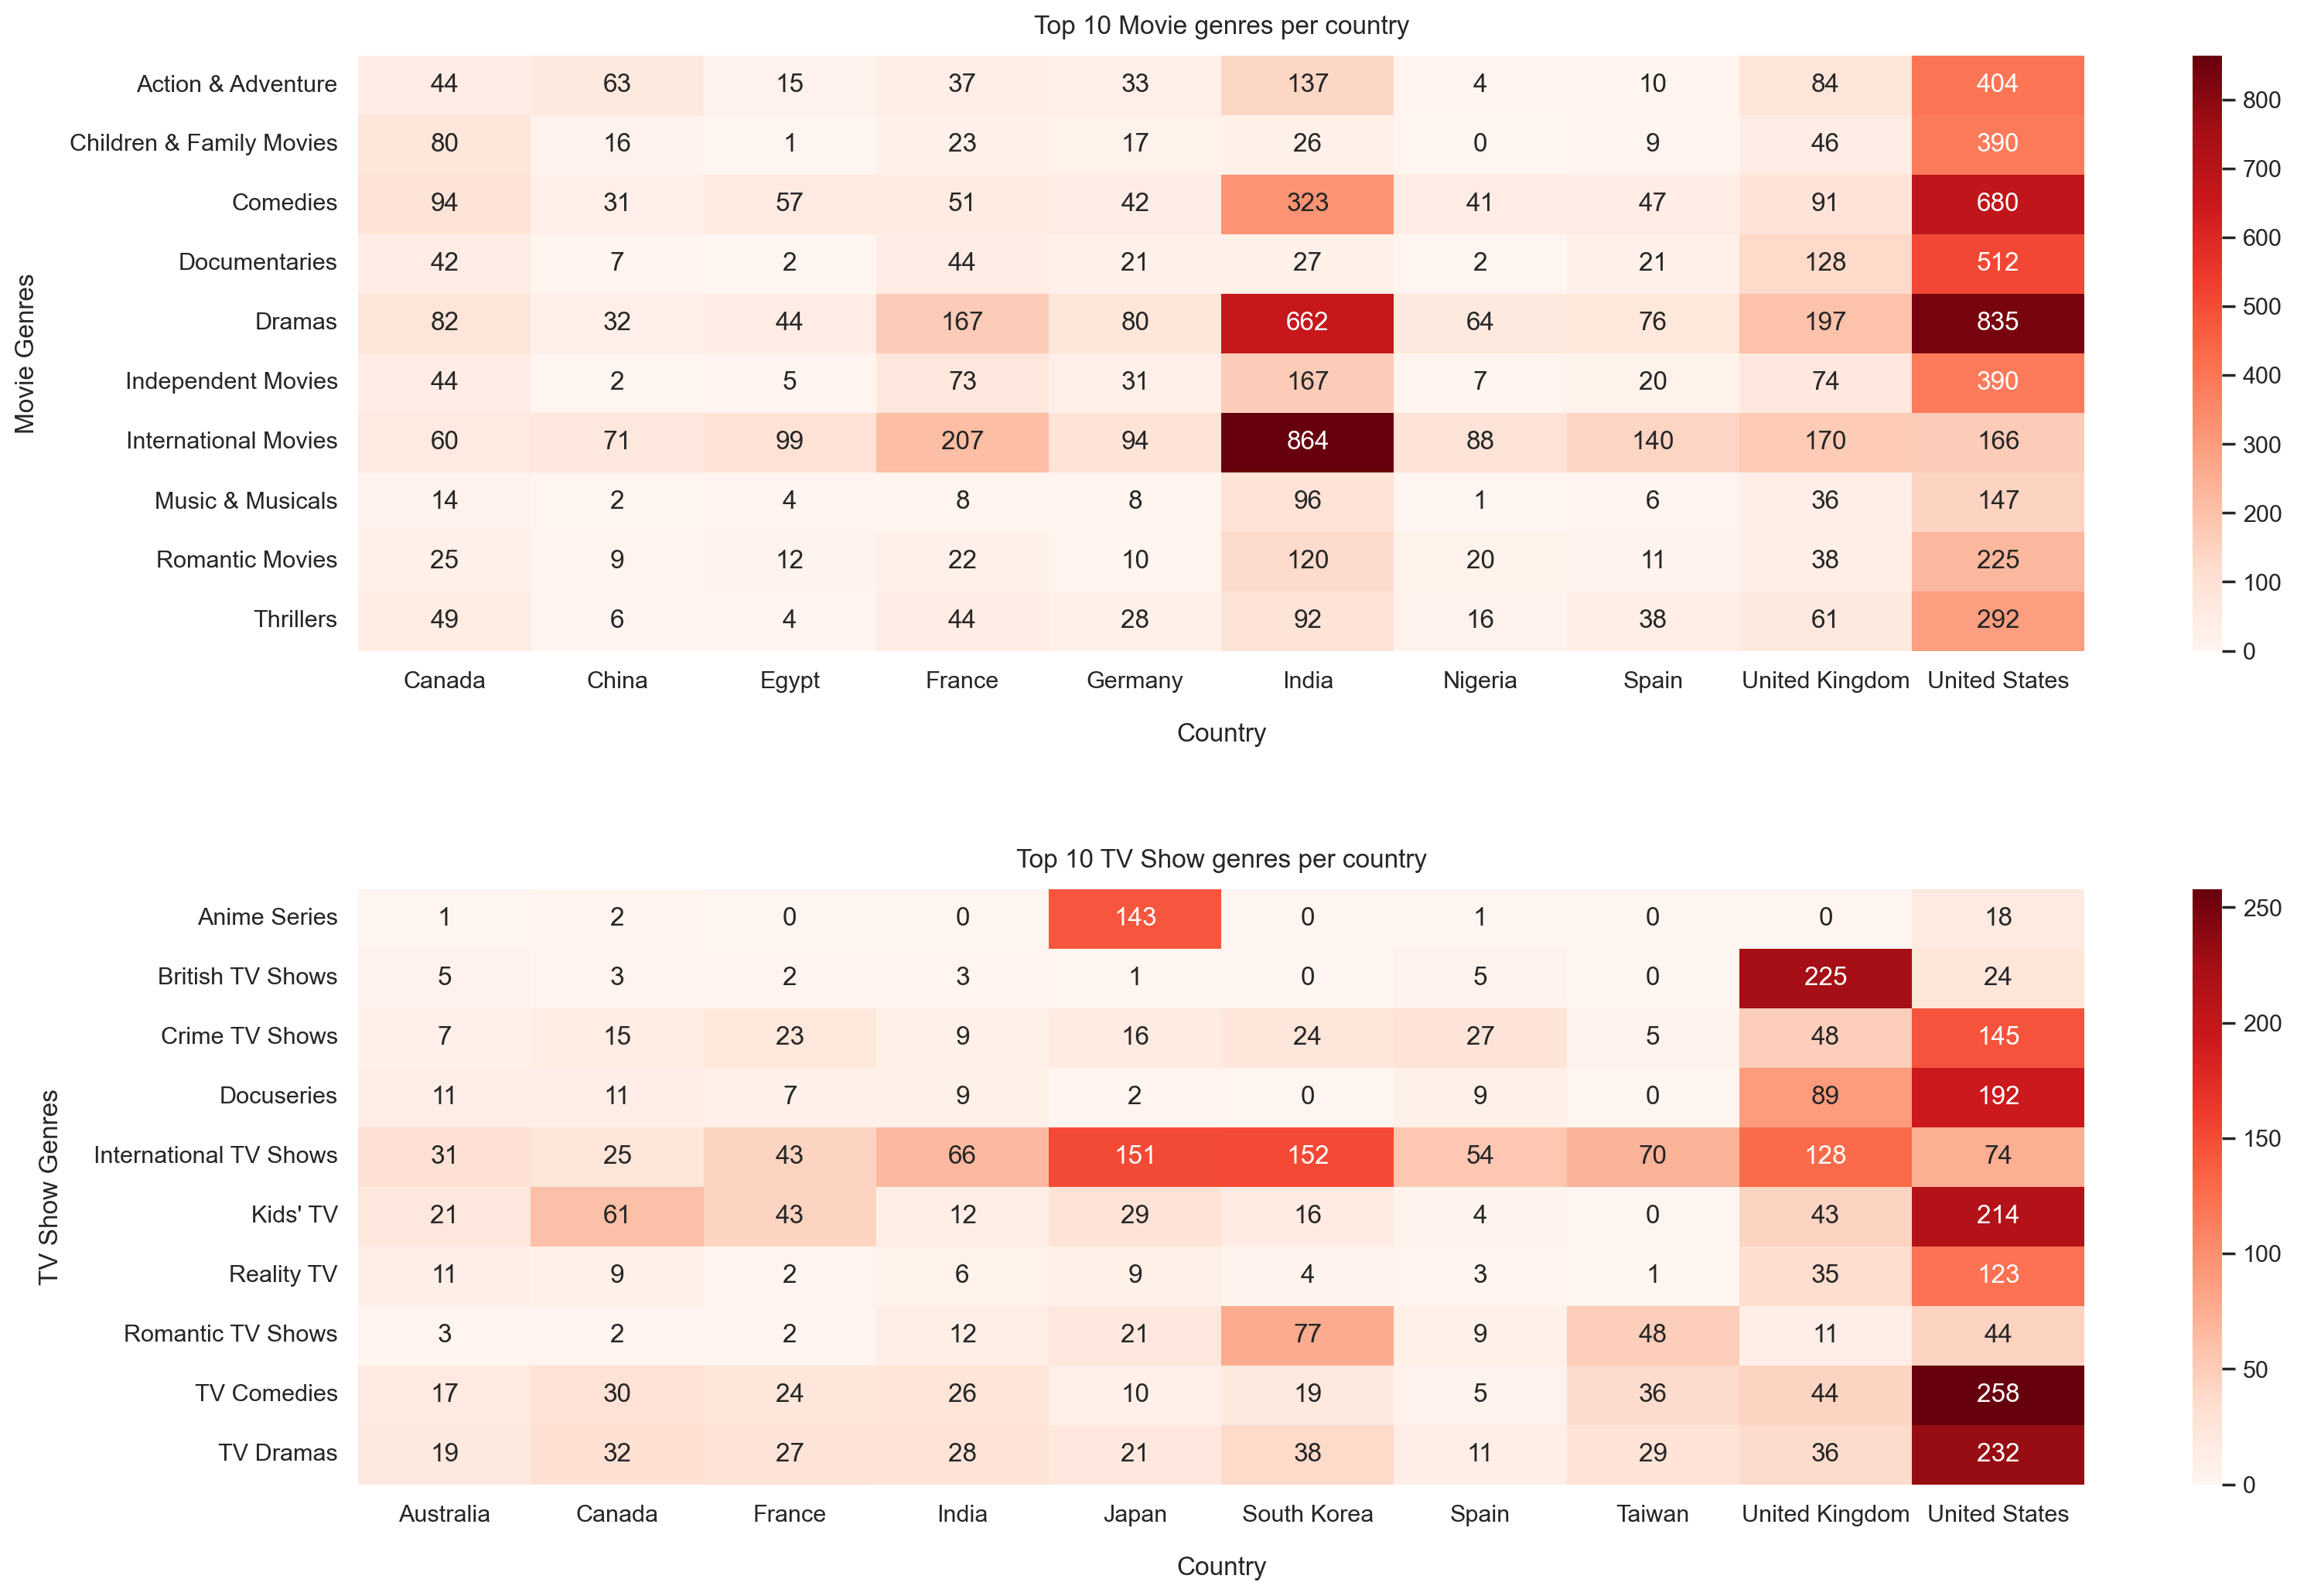

In [45]:
#What are the most popular genres added mostly in Top 10 country on Netflix?
#df_netflix_filtered = df_netflix[df_netflix['country'] != 'Not-Available']


#Exploding the data/splitting the nested data to use in plots
def explode_data(df_netflix, col: str, name: str, along: str = 'release_year'):
    return (
        df_netflix  # Corrected to use df_netflix instead of data
        [col]
        .apply(lambda x: x.replace(', ', ',').replace(' ,', ',').split(','))
        .to_frame()
        .set_index(df_netflix[along])
        .explode(col)
        .replace('', np.nan)
        .replace('NA', np.nan)
        .dropna()
        .stack()
        .to_frame()
        .reset_index()
        .drop('level_1', axis=1)
        .rename(columns={0: name})
    )

country_data = explode_data(df_netflix, 'country', 'country', 'title')
genre_data = explode_data(df_netflix, 'listed_in', 'genre', 'title')
genre_data_type = explode_data(df_netflix, 'listed_in', 'genre', 'type')

genre_data_type = genre_data_type.value_counts().reset_index(level=1)
top_movie_genres = list(genre_data_type.loc['Movie'].head(10)['genre'].values)
top_tv_genres = list(genre_data_type.loc['TV Show'].head(10)['genre'].values)

df = country_data.merge(genre_data).drop('title', axis=1)
df1 = df[df['genre'].isin(top_movie_genres)]
df2 = df[df['genre'].isin(top_tv_genres)]
#df=df[df['country']!= 'Not-Available']

def make_data(df):
    return (
        df
        [df['country'].isin(df['country'].value_counts().head(11).index)]
        .value_counts()
        .reset_index()
        .pivot("genre", "country", 0)
        .fillna(0)
        .apply(lambda x: x.astype('int'))
    )

df1 = make_data(df1)
df2 = make_data(df2)
df1.drop(['Not-Available'],axis=1,inplace=True)
df2.drop(['Not-Available'],axis=1,inplace=True)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(18, 12), dpi=200)
fig.subplots_adjust(hspace=0.4)

sns.heatmap(df1, annot=True, fmt="d", cmap='Reds', ax=ax1)
ax1.set_xlabel('Country', labelpad=14)
ax1.set_ylabel('Movie Genres', labelpad=14)
ax1.set_title('Top 10 Movie genres per country', pad=10)

sns.heatmap(df2, annot=True, fmt="d", cmap='Reds', ax=ax2)
ax2.set_xlabel('Country', labelpad=14)
ax2.set_ylabel('TV Show Genres', labelpad=14)
ax2.set_title('Top 10 TV Show genres per country', pad=10)
plt.show()

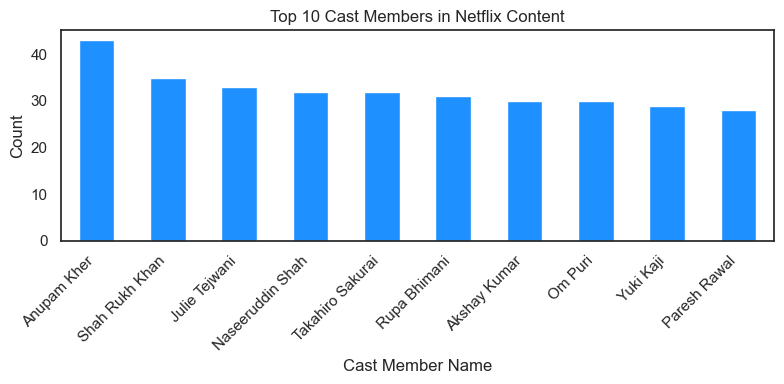

In [46]:
#Top 10 casts

cast_data = explode_data(df_netflix, 'cast', 'cast')
top_cast=cast_data[(cast_data['cast']!='Not-Available')]['cast'].value_counts().head(10)

plt.figure(figsize=(8, 4))
top_cast.plot(kind='bar', color='dodgerblue')
plt.title('Top 10 Cast Members in Netflix Content')
plt.xlabel('Cast Member Name')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [47]:
df_netflix['director'].value_counts().sort_values(ascending=False)[:30]

Not-Available             2634
Rajiv Chilaka               19
Raúl Campos, Jan Suter      18
Suhas Kadav                 16
Marcus Raboy                16
Jay Karas                   14
Cathy Garcia-Molina         13
Youssef Chahine             12
Martin Scorsese             12
Jay Chapman                 12
Steven Spielberg            11
Don Michael Paul            10
David Dhawan                 9
Kunle Afolayan               8
Robert Rodriguez             8
Fernando Ayllón              8
Hakan Algül                  8
Johnnie To                   8
Ryan Polito                  8
Troy Miller                  8
Lance Bangs                  8
Yılmaz Erdoğan               8
Quentin Tarantino            8
Shannon Hartman              8
Hidenori Inoue               7
Omoni Oboli                  7
Ron Howard                   7
Ozan Açıktan                 7
Ram Gopal Varma              7
Clint Eastwood               7
Name: director, dtype: int64

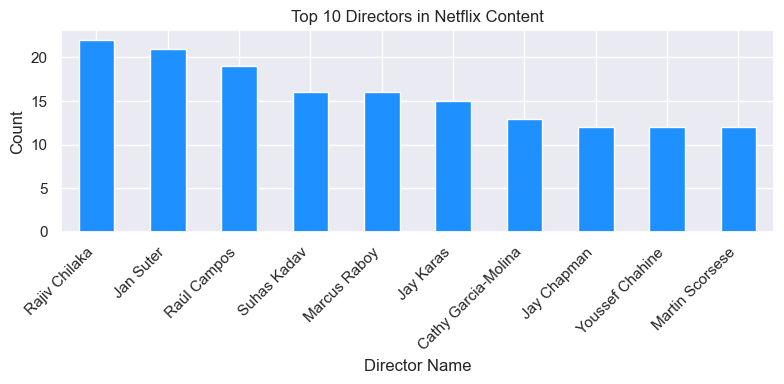

In [61]:
#Top 10 directors

director_data = (
    df_netflix
    .assign(director=df_netflix['director'].str.split(', '))
    .explode('director')
    .query("(director != 'Not-Available')")
)

# Getting the top 10 directors
top_directors = director_data['director'].value_counts().head(10)

# Plotting the top 10 directors
plt.figure(figsize=(8, 4))
top_directors.plot(kind='bar', color='dodgerblue')
plt.title('Top 10 Directors in Netflix Content')
plt.xlabel('Director Name')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


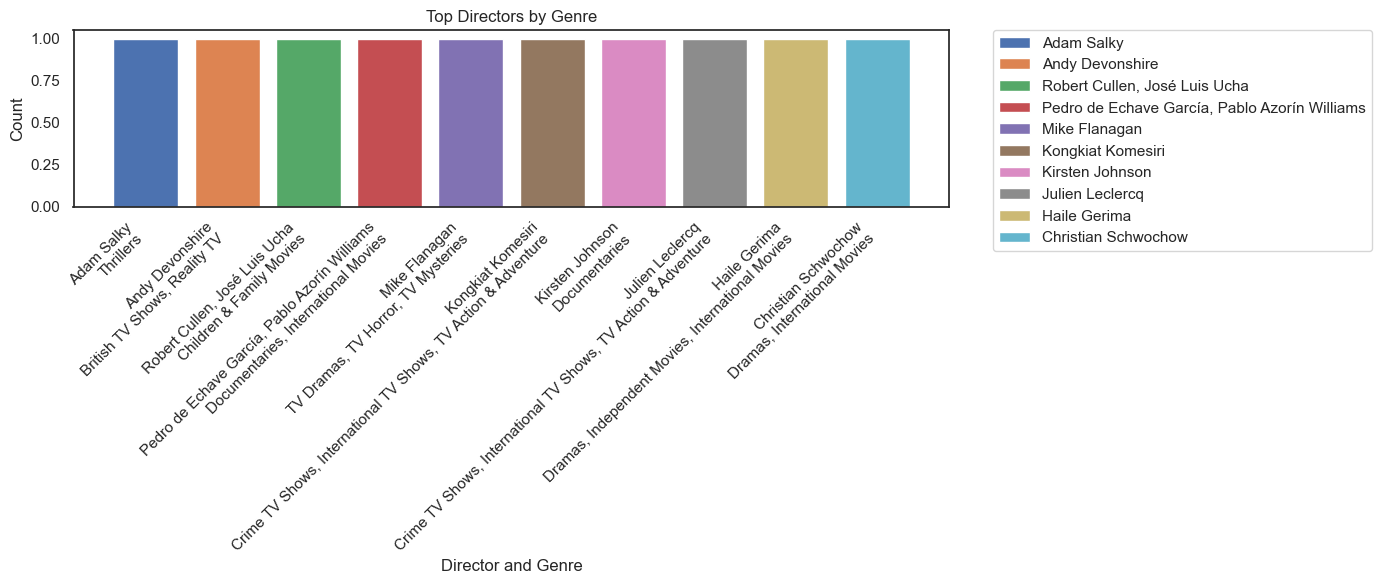

In [49]:
#Top Directors grouped by Genre

#df_netf=df_netflix.groupby('director')[['director','listed_in']]
#df_netf.head(10)

df_netflix['genre_list'] = df_netflix['listed_in'].str.split('|')
director_genre_df = df_netflix.explode('genre_list').head(20)

top_director_genre_pairs = director_genre_df.groupby(['director', 'genre_list']).size().reset_index(name='count')
top_director_genre_pairs = top_director_genre_pairs.sort_values(by='count', ascending=False)
top_director_genre_pairs = top_director_genre_pairs.loc[top_director_genre_pairs['director'] != 'Not-Available']

top_directors = top_director_genre_pairs['director'].unique()[:10]

plt.figure(figsize=(14, 6))
for director in top_directors:
    data_subset = top_director_genre_pairs[top_director_genre_pairs['director'] == director]
    plt.bar(data_subset['director'] + '\n' + data_subset['genre_list'], data_subset['count'], label=director)

plt.xlabel('Director and Genre')
plt.ylabel('Count')
plt.title('Top Directors by Genre')
plt.xticks(rotation=45, ha='right')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.tight_layout()
plt.show()

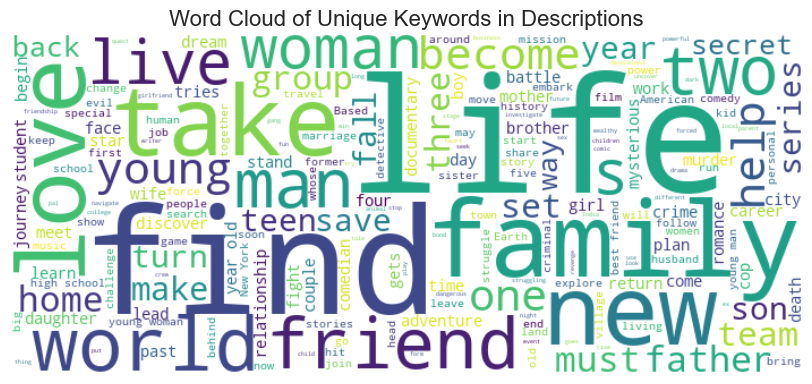

In [50]:
#Wordcloud of Description of shows
from wordcloud import WordCloud
combined_description = ' '.join(df_netflix['description'])

# Generate a WordCloud with unique keywords
wordcloud = WordCloud(width=700, height=300, background_color='white', colormap='viridis', random_state=42).generate(combined_description)

plt.figure(figsize=(12, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Unique Keywords in Descriptions', fontsize=16)

sns.set()
plt.tight_layout()
plt.show()

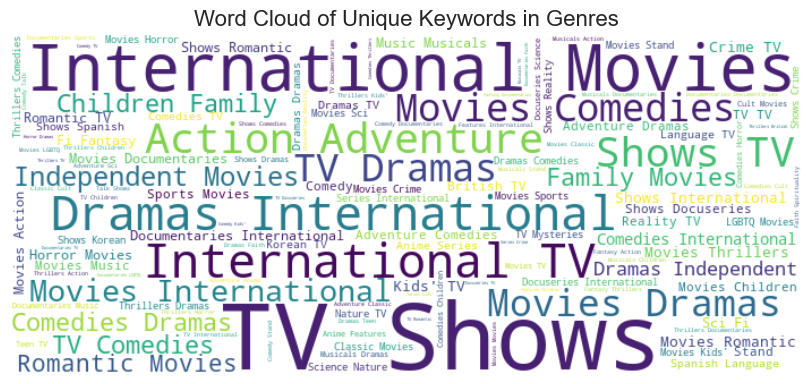

In [51]:
#Wordcloud of Description of Genres
from wordcloud import WordCloud
combined_description = ' '.join(df_netflix['listed_in'])

# Generate a WordCloud with unique keywords
wordcloud = WordCloud(width=700, height=300, background_color='white', colormap='viridis', random_state=42).generate(combined_description)

plt.figure(figsize=(12, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Unique Keywords in Genres', fontsize=16)

sns.set()
plt.tight_layout()
plt.show()